# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
dir(stats)



['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

In [6]:
# TODO - during class, but please help!
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

import numpy as np
import pandas as pd

df = pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


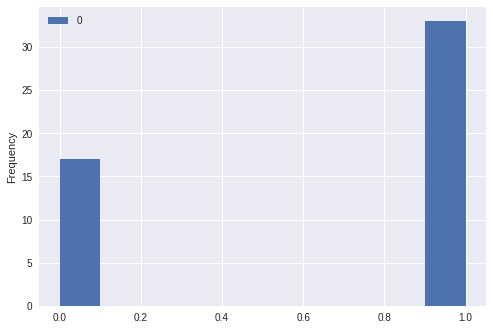

In [7]:
df.plot.hist()

In [8]:
# Now with confidence!

import scipy
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [9]:
# the t-statistic is the ratio of the departure of the estimated value of  a
# parameter from its hypothesized value to its standard error

# We want to calculate: tstat = 2.364321853156195

sample_stderr = 0.478518 / np.sqrt(len(survey_data))
sample_mean = 0.660000
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [10]:
len(survey_data)

50

In [0]:
# Science! Reproducibility...
import random

def make_soda_data(n=50):
  # Fair version
  # return pd.DataFrame([random.randint(0, 1) for _ in range(n)])
  # Unfair version!
  return pd.DataFrame(np.random.binomial(n=1, p=0.5, size=n))

In [12]:
make_soda_data(n=500).describe()

,0
count,500.000000
mean,0.532000
std,0.499475
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
t_statistics = []
p_values = []
n_experiments = 10  # Number of visitors

for _ in range(n_experiments):
  df = make_soda_data(n=500000)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

,0
count,10.000000
mean,0.784326
std,1.158726
min,-0.667508
25%,0.076367
50%,0.318198
75%,1.477148
max,2.754906


In [14]:
pd.DataFrame(p_values).describe()

,0
count,10.000000
mean,0.514960
std,0.386740
min,0.005871
25%,0.153173
50%,0.554592
75%,0.890949
max,0.945879


In [15]:
random.choice([0, 1, 1])  # Unfair coins

0

In [16]:
np.random.binomial(100, 0.7)

73

In [17]:
np.random.binomial(1, 0.6)

1

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [63]:
# TODO - your code here!
Vot_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(Vot_URL, header=None, names = ['party', 'handi', 'water', 'adopt', 'phys', 'el-sal', 'relig', 'antsat', 'aidnic', 'mx', 'imig', 'syn', 'edu', 'super', 'crime', 'duty', 'exp'])
df.replace('?', np.NaN)
dfnan = df.replace({"republican": 1, "democrat": 0, "y":1, "n":0, "?": 1}, inplace=True)
df.head()


,party,handi,water,adopt,phys,el-sal,relig,antsat,aidnic,mx,imig,syn,edu,super,crime,duty,exp
0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)

In [99]:

party = df.groupby(['party']).mean()
party

,handi,water,adopt,phys,el-sal,relig,antsat,aidnic,mx,imig,syn,edu,super,crime,duty,exp
party,,,,,,,,,,,,,,,,
0,0.617978,0.554307,0.891386,0.082397,0.250936,0.494382,0.779026,0.831461,0.775281,0.479401,0.528090,0.202247,0.329588,0.374532,0.659176,0.955056
1,0.202381,0.565476,0.154762,0.988095,0.952381,0.898810,0.267857,0.208333,0.130952,0.565476,0.178571,0.880952,0.869048,0.982143,0.154762,0.702381


In [93]:
print(scipy.stats.ttest_1samp(party['handi'], 0.5))
print(scipy.stats.ttest_1samp(party['phys'], 0.5))
print(scipy.stats.ttest_1samp(party['antsat'], 0.5))
print(scipy.stats.ttest_1samp(party['aidnic'], 0.5))
print(scipy.stats.ttest_1samp(party['mx'], 0.5))
print(scipy.stats.ttest_1samp(party['syn'], 0.5))
print(scipy.stats.ttest_1samp(party['duty'], 0.5))
print(scipy.stats.ttest_1samp(party['exp'], 0.5))

Ttest_1sampResult(statistic=-0.43224975860959153, pvalue=0.7402621900214107)
Ttest_1sampResult(statistic=0.0778319302909467, pvalue=0.9505503456554587)
Ttest_1sampResult(statistic=0.09171791181473254, pvalue=0.9417734698013289)
Ttest_1sampResult(statistic=0.06386175807663404, pvalue=0.9593994762438196)
Ttest_1sampResult(statistic=-0.14552626115839737, pvalue=0.9080009260009041)
Ttest_1sampResult(statistic=-0.839265212399541, pvalue=0.5554937021336583)
Ttest_1sampResult(statistic=-0.3688676743569346, pvalue=0.775029028400328)
Ttest_1sampResult(statistic=2.6019057702488086, pvalue=0.23359387549524416)


In [94]:
print(scipy.stats.ttest_1samp(party['water'], 0.5))
print(scipy.stats.ttest_1samp(party['adopt'], 0.5))
print(scipy.stats.ttest_1samp(party['el-sal'], 0.5))
print(scipy.stats.ttest_1samp(party['relig'], 0.5))
print(scipy.stats.ttest_1samp(party['imig'], 0.5))
print(scipy.stats.ttest_1samp(party['edu'], 0.5))
print(scipy.stats.ttest_1samp(party['super'], 0.5))
print(scipy.stats.ttest_1samp(party['crime'], 0.5))


Ttest_1sampResult(statistic=10.724550898203624, pvalue=0.05918982768890287)
Ttest_1sampResult(statistic=0.06264753949518774, pvalue=0.9601693911621281)
Ttest_1sampResult(statistic=0.28985507246376796, pvalue=0.8203944538638122)
Ttest_1sampResult(statistic=0.9722176285761533, pvalue=0.5089673862215267)
Ttest_1sampResult(statistic=0.5213675213675221, pvalue=0.6940436321315869)
Ttest_1sampResult(statistic=0.12258573117855741, pvalue=0.9223469241859927)
Ttest_1sampResult(statistic=0.3682122489461938, pvalue=0.7753963895519105)
Ttest_1sampResult(statistic=0.5870115575123833, pvalue=0.6620730386074913)


In [0]:
r